<a href="https://colab.research.google.com/github/saisurajkarra/Human_Activity_Recognition_App/blob/main/Human_Activity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data
- [Downloaded file](http://www.cis.fordham.edu/wisdm/dataset.php)
- Unzipped and copied the folder onto my Google Drive.
- Mounted Google Drive.  
- Read the data into numpy arrays.



In [ ]:
#
# Mount Google Drive.
#
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! head -5 '/content/drive/MyDrive/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt'

33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286;
33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172;
33,Jogging,49106332290000,-1.1849703,12.108489,7.205164;



As there are semicolomns in the data we need to remove them 

In [ ]:

!sed 's/;//' '/content/drive/MyDrive/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt'  > '/content/drive/My Drive/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.nosemi'

In [ ]:
! head -5 '/content/drive/My Drive/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.nosemi'

33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
33,Jogging,49106062271000,5.012288,11.264028,0.95342433
33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


##loading data


In [ ]:

import pandas as pd
columns = ['user','activity','timestamp','x-axis','y-axis','z-axis']
df = pd.read_csv('/content/drive/My Drive/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.nosemi',header=None,names=columns,sep=',')
df.dropna()
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098204 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1098204 non-null  int64  
 1   activity   1098204 non-null  object 
 2   timestamp  1098204 non-null  int64  
 3   x-axis     1098204 non-null  float64
 4   y-axis     1098204 non-null  float64
 5   z-axis     1098203 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ MB


In [ ]:
df.shape

(1098204, 6)

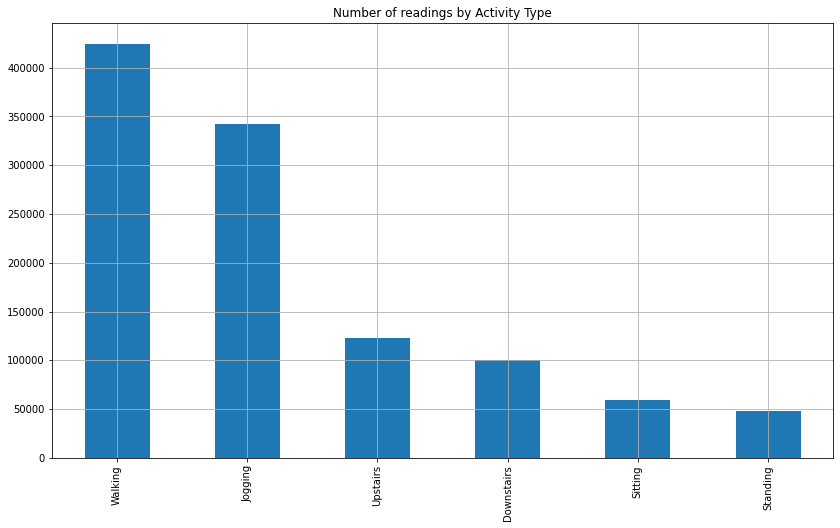

In [ ]:
countOfActivities = df['activity'].value_counts()
countOfActivities.plot(kind='bar',title='Number of readings by Activity Type',figsize=(14,8),grid=True);

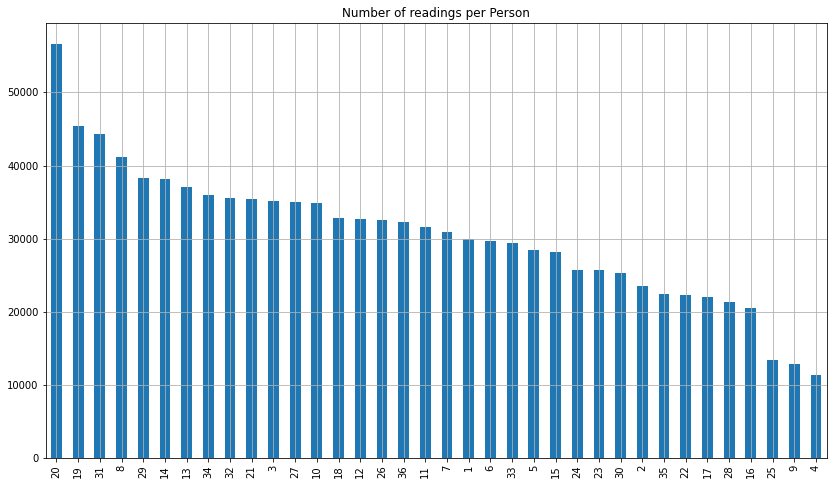

In [ ]:
countOfReadingsPerPerson = df['user'].value_counts()
countOfReadingsPerPerson.plot(kind='bar',title='Number of readings per Person',figsize=(14,8),grid=True);


# Visualize

In [ ]:
def plot_activity(activity,df,start=0,stop=200):
  extractRowsOfActivity = (df['activity'] == activity)  # Output will be true/false.
  data = df[extractRowsOfActivity] # data has only rows that are for the requested activity.
  data = data[['x-axis','y-axis','z-axis']] # data has only the accelerometer columns.
  data = data[start:stop]
  
  ax = data.plot(subplots=True,figsize=(16,12),title=activity+ ', Start Row: '+str(start)+' Stop row: '+str(stop)) # Plot accelerometer for the activity.

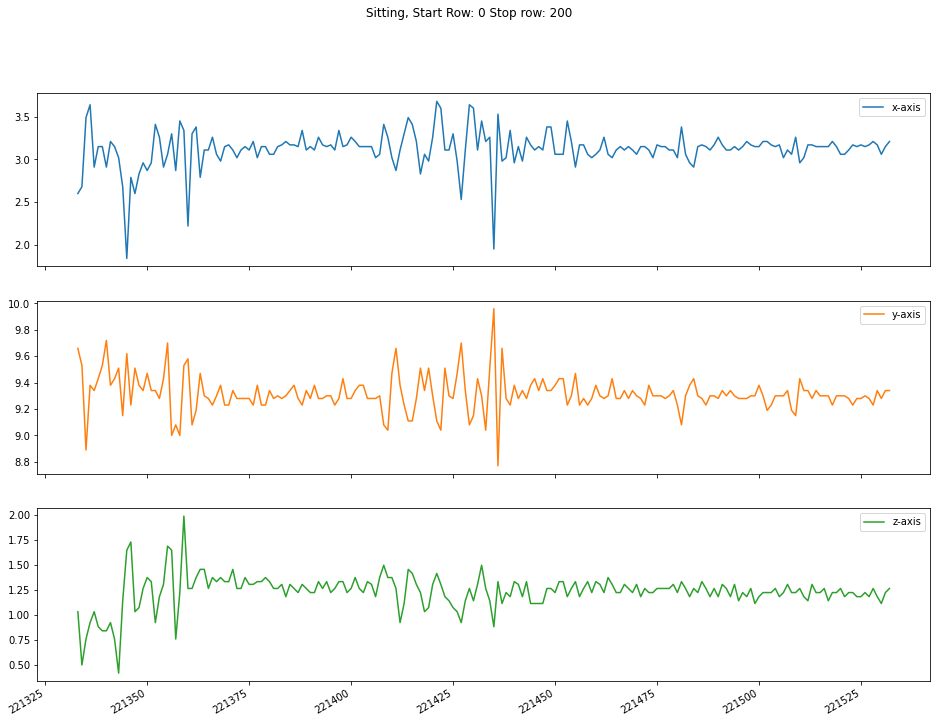

In [ ]:
plot_activity('Sitting',df)

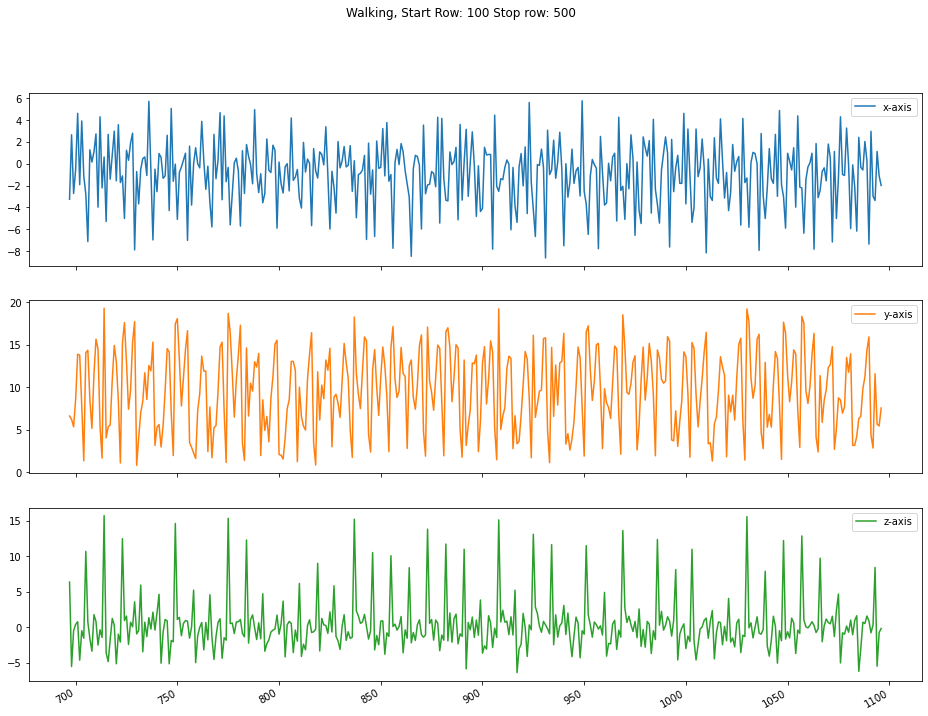

In [ ]:
plot_activity('Walking',df,100,500)

# Data Preprocessing 
The data preprocessing we'll be doing includes:  
- Normalizing the measurements to be between 0 and 1.
- Transforming the measurements to be in a 3-D array of [samples, timesteps,features].
- One hot encoding the activity names.
- Breaking the 3-D array into a training, validation, and test dataset.  

## Nomalizing the Data
Big numbers overpower little numbers.  To not let that happen, we normalize the data to values between 0 and 1.



In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df['x-axis_mms'] = mms.fit_transform(df[['x-axis']])
df['y-axis_mms'] = mms.fit_transform(df[['y-axis']])
df['z-axis_mms'] = mms.fit_transform(df[['z-axis']])
df.describe().round(2)

,user,timestamp,x-axis,y-axis,z-axis,x-axis_mms,y-axis_mms,z-axis_mms
count,1098204.00,1.098204e+06,1098204.00,1098204.00,1098203.00,1098204.00,1098204.00,1098203.00
mean,18.86,3.340907e+13,0.66,7.26,0.41,0.51,0.68,0.51
std,10.21,4.944967e+13,6.85,6.75,4.75,0.17,0.17,0.12
min,1.00,0.000000e+00,-19.61,-19.61,-19.80,0.00,0.00,0.00
25%,10.00,2.019113e+12,-2.87,3.17,-2.22,0.42,0.57,0.45
50%,19.00,9.722777e+12,0.27,7.93,0.00,0.50,0.69,0.50
75%,28.00,4.996570e+13,4.44,11.56,2.72,0.61,0.79,0.57
max,36.00,2.093974e+14,19.95,20.04,19.61,1.00,1.00,1.00


In [ ]:

import numpy as np
from scipy import stats
nSamplesInEach = 200
nFeatures = 3
samples = []
labels = []
for i in range(0,len(df)-nSamplesInEach,nSamplesInEach):
  xa = df['x-axis_mms'].values[i:i+nSamplesInEach]
  ya = df['y-axis_mms'].values[i:i+nSamplesInEach]
  za = df['z-axis_mms'].values[i:i+nSamplesInEach]
  label = stats.mode(df['activity'][i:i+nSamplesInEach])
  label = label[0][0]

  samples.append([xa,ya,za])
  labels.append(label)
np.array(samples).shape

(5491, 3, 200)

### Reshape
We want (samples, time steps, features).  The data set is in 3-D but (5491 samples,3 rows of features,200 columns of time steps).  We need to reshape this to (samples,time series, features).


In [ ]:
reshaped_s = np.array(samples).reshape(-1,nSamplesInEach,nFeatures)
np.array(reshaped_s).shape


(5491, 200, 3)

## One Hot Encode Labels


In [ ]:
labels[:10]

['Jogging',
 'Jogging',
 'Jogging',
 'Walking',
 'Walking',
 'Walking',
 'Upstairs',
 'Upstairs',
 'Upstairs',
 'Downstairs']

In [ ]:

labels = np.array(pd.get_dummies(labels))
labels[:10]

array([[0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
labels.shape

(5491, 6)

## Training, Validation, and Test Data
### Split into Train and Test Data sets

We'll use 80% of the measurements for training and validation.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(reshaped_s,labels,test_size=.2,random_state=42)
len(X_train)

4392

In [ ]:
len(X_test)

1099

In [ ]:
X_train_partial = X_train[:3515]
X_val = X_train[3515:]
Y_train_partial = Y_train[:3515]
Y_val = Y_train[3515:]

## Build the model



In [ ]:

n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features,n_outputs))

n_timesteps: 200, n_features: 3, n_outputs: 6


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

### First Model


In [ ]:
model = keras.Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               41600     
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 606       
Total params: 62,406
Trainable params: 62,406
Non-trainable params: 0
_________________________________________________________________


### Second  Model


In [ ]:
model = keras.Sequential()
model.add(LSTM(64,input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))


## Loss function and optimizer

. 

In [ ]:
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train the model

Train the model for 40 epochs in mini-batches of 512 samples. This is 40 iterations over all samples in the `x_train` and `y_train` tensors. While training, monitor the model's loss and accuracy on the samples from the validation set:

In [ ]:
history = model.fit(X_train_partial,
                    Y_train_partial,
                    epochs=30,
                    batch_size=64,
                    validation_data=(X_val, Y_val),
                    verbose=1)

Epoch 1/30
55/55 [==============================] - 5s 27ms/step - loss: 1.6547 - accuracy: 0.3054 - val_loss: 1.5089 - val_accuracy: 0.3729
Epoch 2/30
55/55 [==============================] - 1s 11ms/step - loss: 1.4922 - accuracy: 0.3954 - val_loss: 1.5013 - val_accuracy: 0.3729
Epoch 3/30
55/55 [==============================] - 1s 11ms/step - loss: 1.5148 - accuracy: 0.3565 - val_loss: 1.4959 - val_accuracy: 0.3729
Epoch 4/30
55/55 [==============================] - 1s 12ms/step - loss: 1.5044 - accuracy: 0.3878 - val_loss: 1.4217 - val_accuracy: 0.3729
Epoch 5/30
55/55 [==============================] - 1s 12ms/step - loss: 1.4463 - accuracy: 0.3871 - val_loss: 1.3654 - val_accuracy: 0.4196
Epoch 6/30
55/55 [==============================] - 1s 12ms/step - loss: 1.3524 - accuracy: 0.4434 - val_loss: 1.3068 - val_accuracy: 0.4219
Epoch 7/30
55/55 [==============================] - 1s 10ms/step - loss: 1.3160 - accuracy: 0.4422 - val_loss: 1.3092 - val_accuracy: 0.4219
Epoch 8/30
55

## Evaluate the model


In [ ]:
results = model.evaluate(X_test, Y_test)

print(results)

35/35 [==============================] - 0s 4ms/step - loss: 1.3447 - accuracy: 0.4086
[1.3447238206863403, 0.40855324268341064]


## Create a graph of accuracy and loss over time

`model.fit()` returns a `History` object that contains a dictionary with everything that happened during training:

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

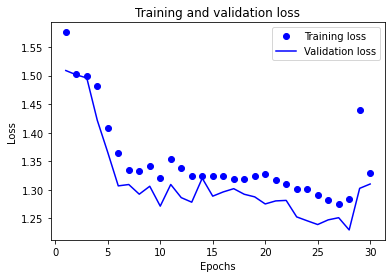

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
!pip install colabcode

In [ ]:
!pip install fastapi

     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 10.1MB 34.8MB/s 


In [ ]:
import pickle
Pkl_Filename = "model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(results, file)


In [ ]:
from pydantic import BaseModel
class HAR(BaseModel):
    sitting: float 
    walking: float 
    jogging: float 
    standing: float 
    upstairs: float 
    downstairs: float 
    
    class Config:
        schema_extra = {
            "example": {
                "sitting": 0.838816, 
                "walking": 0.542950, 
                "jogging": 0.669215,
                "standing": 0.000006,
                "upstairs": 0.105610,
                "downstairs": 0.391221,
              
            }
        }

In [ ]:
from fastapi import FastAPI
import pickle

app = FastAPI()

@app.on_event("startup")
def load_model():
    global model
    model = pickle.load(open("model.pkl", "rb"))

@app.get('/')
def index():
    return {'message': 'This is the homepage of the API '}


@app.post('/predict')
def get_music_category(data: HAR):
    received = data.dict()
    sitting = received['sitting']
    standing= received['standing']
    walking = received['walking']
    jogging = received['jogging']
    upstairs = received['upstairs']
    downstairs = received['downstairs']
    pred_name = model.predict([[sitting,
                walking,
                jogging,
                standing,
                upstairs,
                downstairs]]).tolist()[0]
    return {'prediction': pred_name}

In [ ]:
from colabcode import ColabCode
server = ColabCode(port=10000, code=False)

In [ ]:
server.run_app(app=app)

Public URL: NgrokTunnel: "http://69aa170bd3f5.ngrok.io" -> "http://localhost:10000"


INFO:     Started server process [394]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:10000 (Press CTRL+C to quit)


INFO:     117.98.202.150:0 - "GET / HTTP/1.1" 200 OK
INFO:     117.98.202.150:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     117.98.202.150:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     117.98.202.150:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     117.98.202.150:0 - "POST /predict HTTP/1.1" 500 Internal Server Error


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/uvicorn/protocols/http/h11_impl.py", line 394, in run_asgi
    result = await app(self.scope, self.receive, self.send)
  File "/usr/local/lib/python3.7/dist-packages/uvicorn/middleware/proxy_headers.py", line 45, in __call__
    return await self.app(scope, receive, send)
  File "/usr/local/lib/python3.7/dist-packages/fastapi/applications.py", line 199, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.7/dist-packages/starlette/applications.py", line 111, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.7/dist-packages/starlette/middleware/errors.py", line 181, in __call__
    raise exc from None
  File "/usr/local/lib/python3.7/dist-packages/starlette/middleware/errors.py", line 159, in __call__
    await self.app(scope, receive, _send)
  File "/usr/local/lib/python3.7/dist-pa

INFO:     117.98.202.150:0 - "POST /predict HTTP/1.1" 500 Internal Server Error


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/uvicorn/protocols/http/h11_impl.py", line 394, in run_asgi
    result = await app(self.scope, self.receive, self.send)
  File "/usr/local/lib/python3.7/dist-packages/uvicorn/middleware/proxy_headers.py", line 45, in __call__
    return await self.app(scope, receive, send)
  File "/usr/local/lib/python3.7/dist-packages/fastapi/applications.py", line 199, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.7/dist-packages/starlette/applications.py", line 111, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.7/dist-packages/starlette/middleware/errors.py", line 181, in __call__
    raise exc from None
  File "/usr/local/lib/python3.7/dist-packages/starlette/middleware/errors.py", line 159, in __call__
    await self.app(scope, receive, _send)
  File "/usr/local/lib/python3.7/dist-pa